In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/FTS-Air Quality Index Prediction/data/cities_by_day.csv")

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

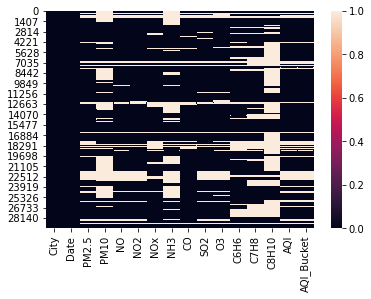

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

# ***CITYWISE MISSING VALUE IMPUTATION*** 

## ***1] Imputaion with forward fill and backward fill***

In [ ]:
df1=df.copy()
df1.iloc[:,2:14]=df1.groupby('City').transform(lambda x: x.ffill())
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


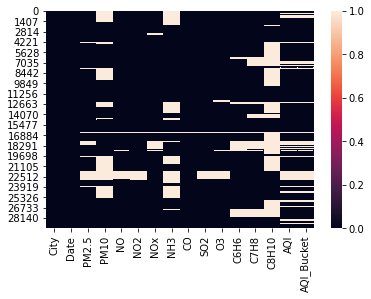

In [ ]:

sns.heatmap(df1.isnull())

In [ ]:
df1.iloc[:,2:14]=df1.groupby('City').transform(lambda x: x.bfill())
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,73.24,141.54,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,73.24,141.54,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,73.24,141.54,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,73.24,141.54,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,73.24,141.54,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


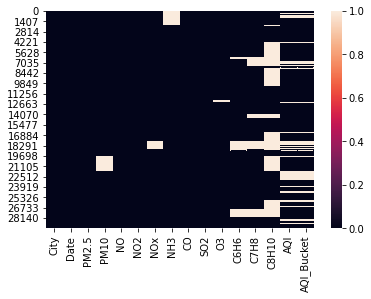

In [ ]:
sns.heatmap(df1.isnull())

In [ ]:
df1.iloc[:,2:14] = df1.groupby('City').transform(lambda x: x.fillna(x.mean()))
df1.iloc[:,2:14] = df1.fillna(df1.iloc[:,2:14].mean())

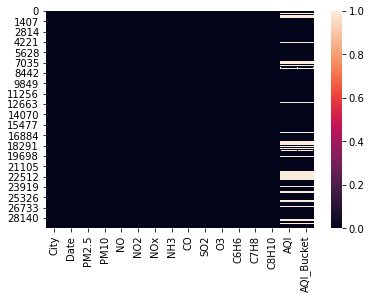

In [ ]:
sns.heatmap(df1.isnull())

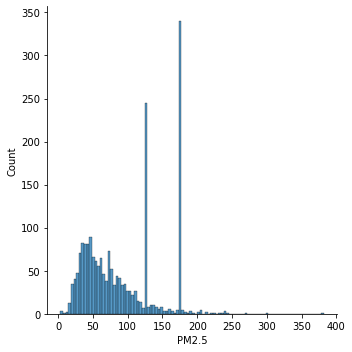

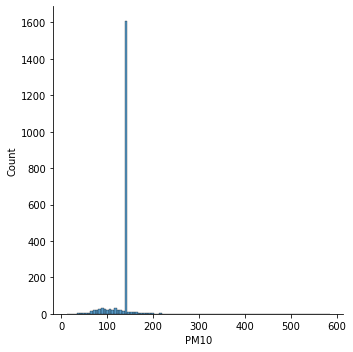

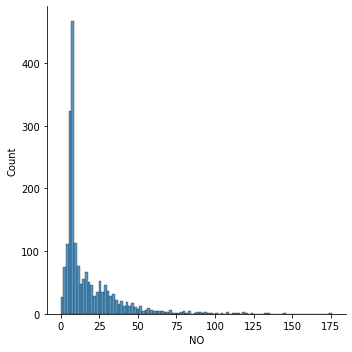

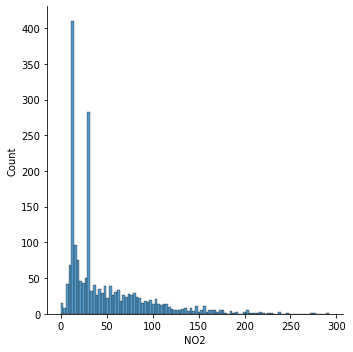

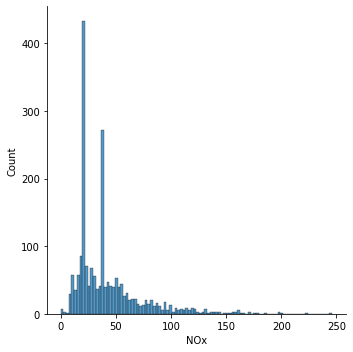

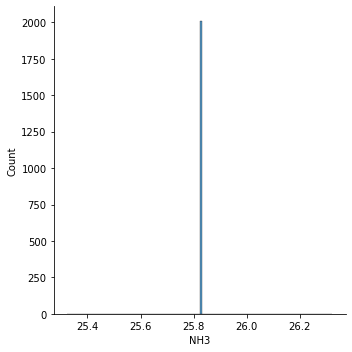

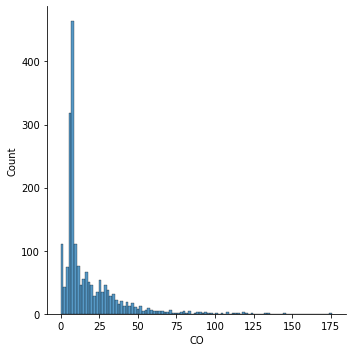

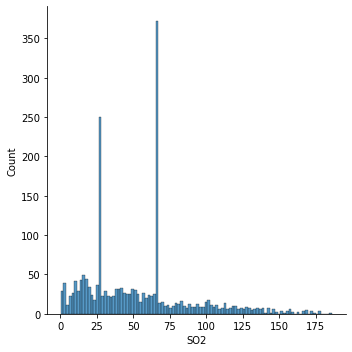

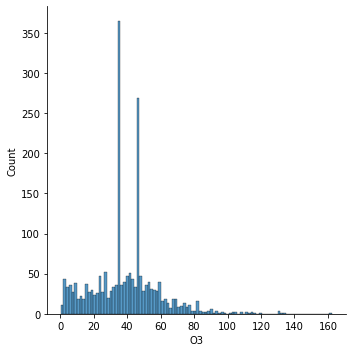

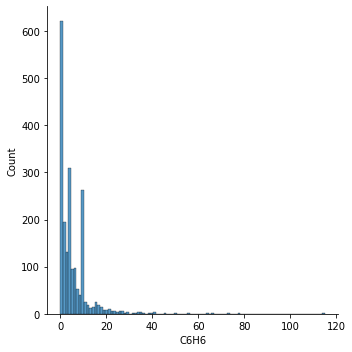

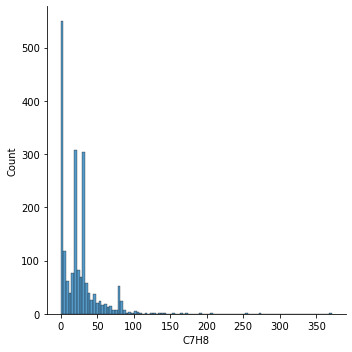

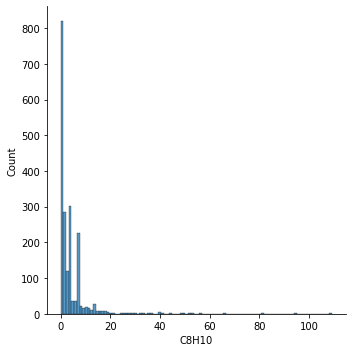

In [ ]:
df1_group=df1.groupby(df1.City)
constituent=df1.columns[2:-2]
for constituent in constituent:
  sns.displot(df1_group.get_group("Ahmedabad")[constituent],bins=100)

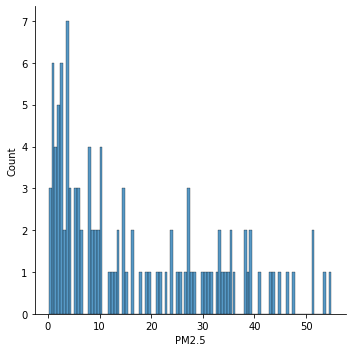

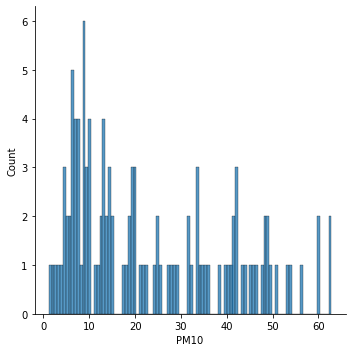

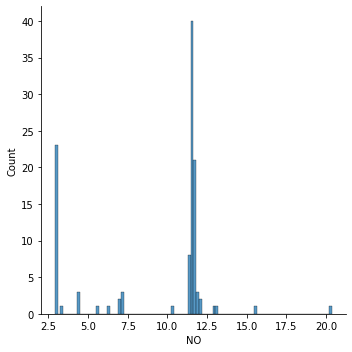

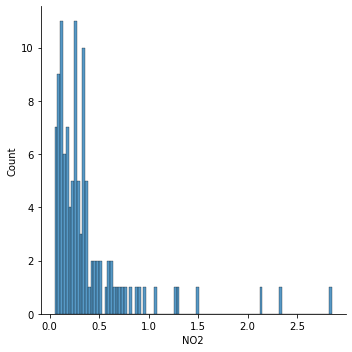

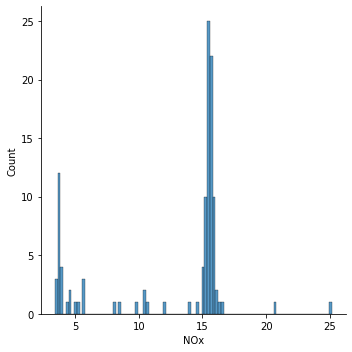

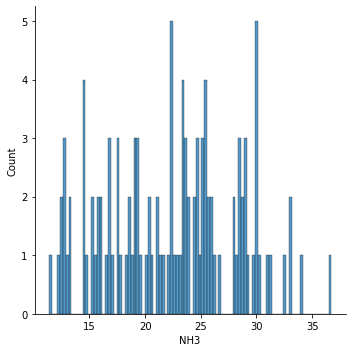

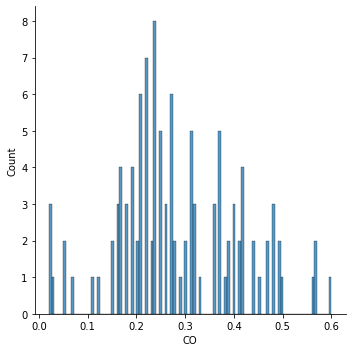

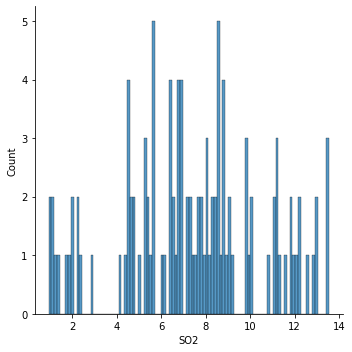

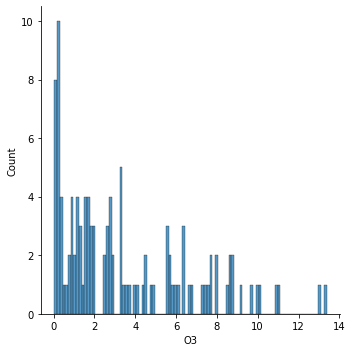

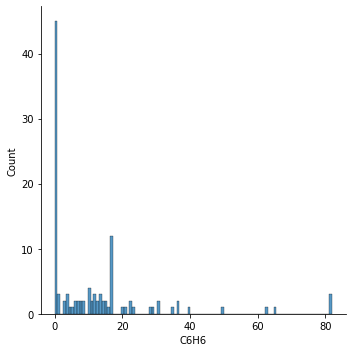

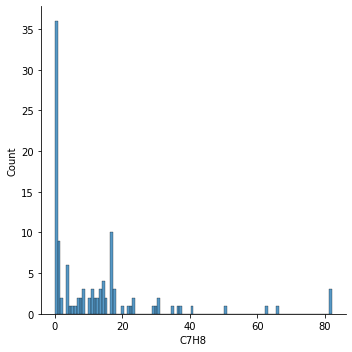

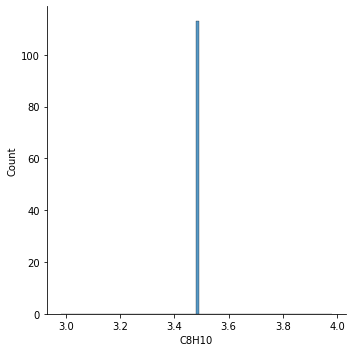

In [ ]:
df1_group=df1.groupby(df1.City)
constituent=df1.columns[2:-2]
for constituent in constituent:
  sns.displot(df1_group.get_group("Aizawl")[constituent],bins=100)

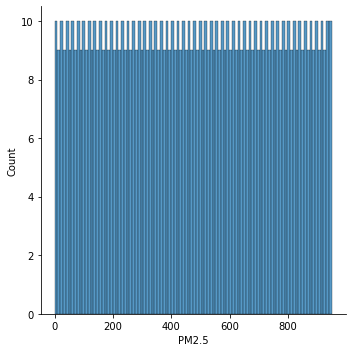

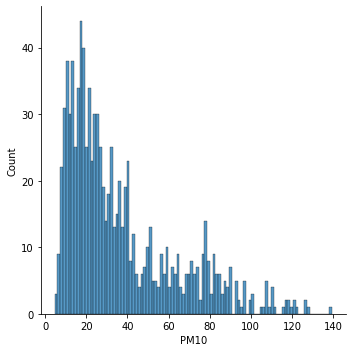

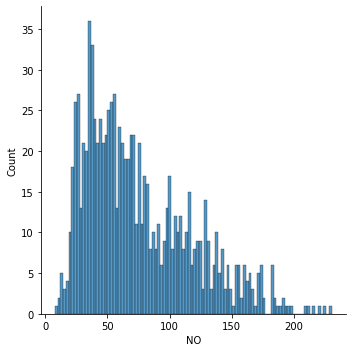

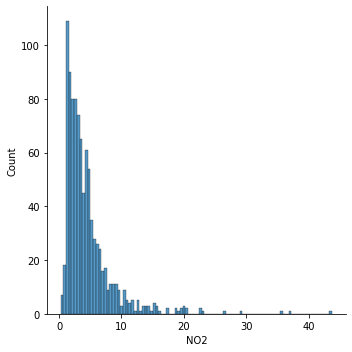

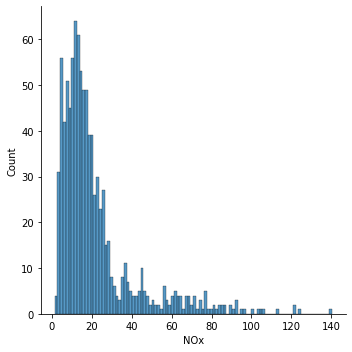

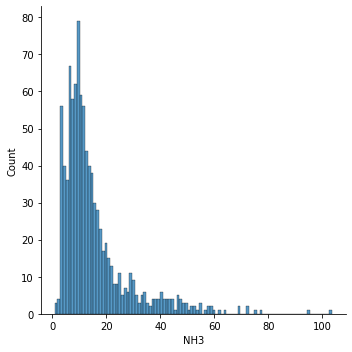

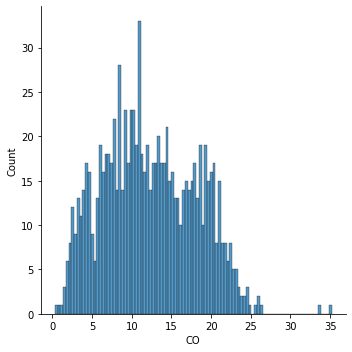

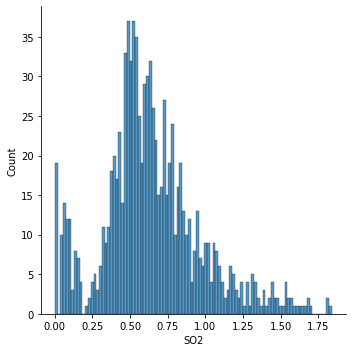

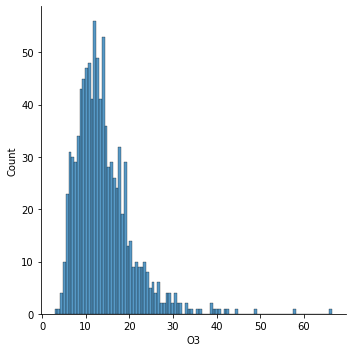

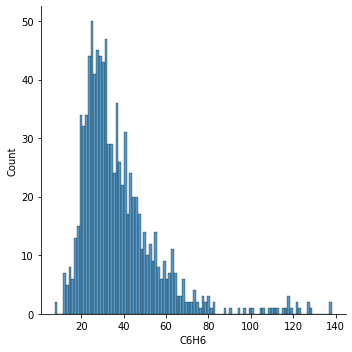

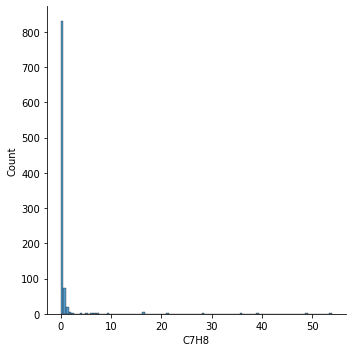

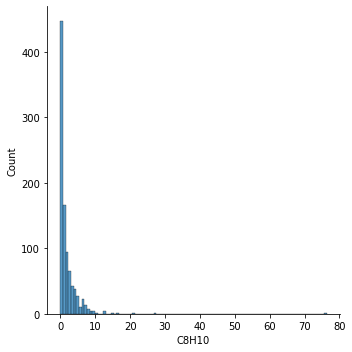

In [ ]:
#Distribution of atmospheric constituents in Amaravati city
df3_group=df3.groupby(df3.City)
constituent=df3.columns[2:-2]
for constituent in constituent:
  sns.displot(df3_group.get_group("Amaravati")[constituent],bins=100)

## ***2] Imputaion with Linear Interpolation***

In [ ]:
df2=df.copy()
df2.drop(columns=['AQI','AQI_Bucket'],inplace=True)

In [ ]:
df2.interpolate(method='linear',limit_direction='forward',inplace=True)

In [ ]:
df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00


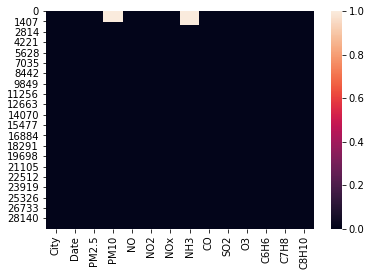

In [ ]:
sns.heatmap(df2.isnull())

In [ ]:
df2.interpolate(method='linear',limit_direction='backward',inplace=True)

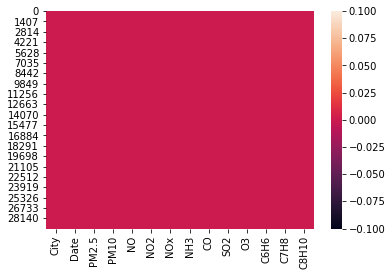

In [ ]:
sns.heatmap(df2.isnull())

In [ ]:
df2['AQI']=df['AQI']
df2['AQI_Bucket']=df['AQI_Bucket']
df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df2_group=df2.groupby(df2.City)

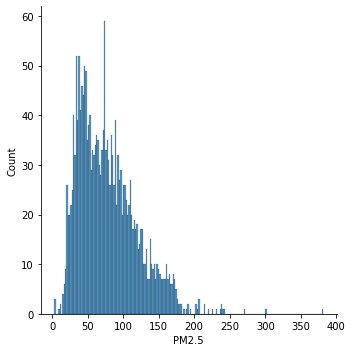

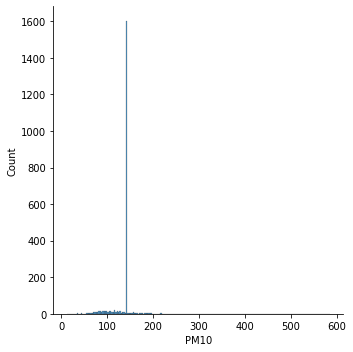

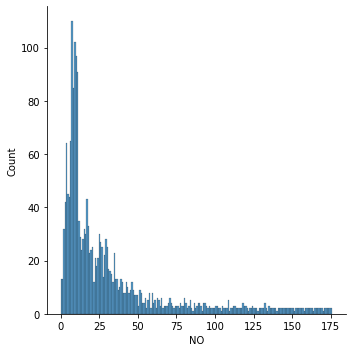

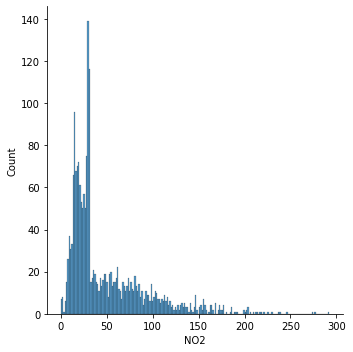

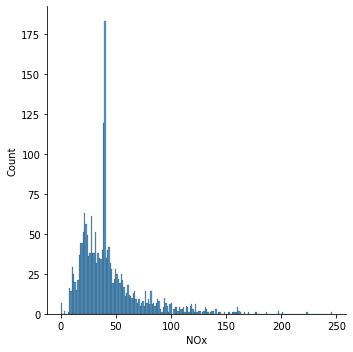

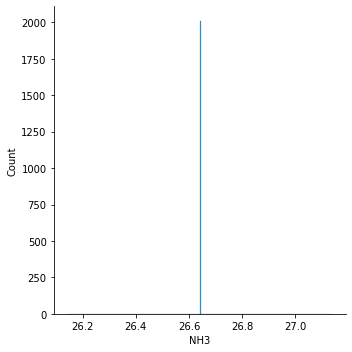

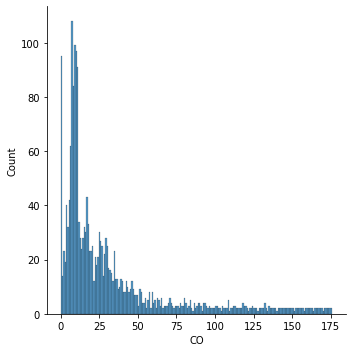

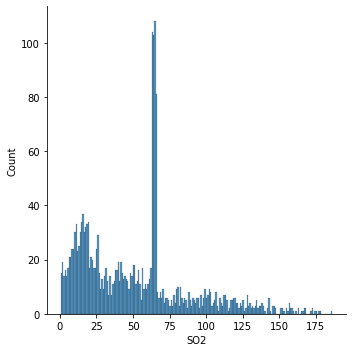

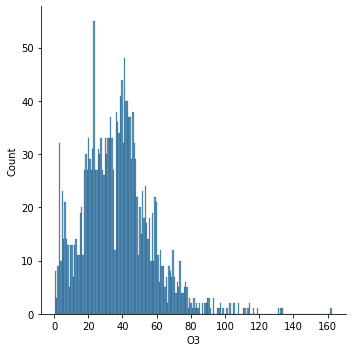

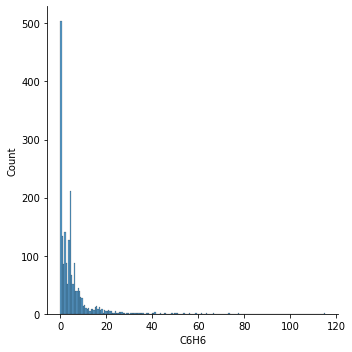

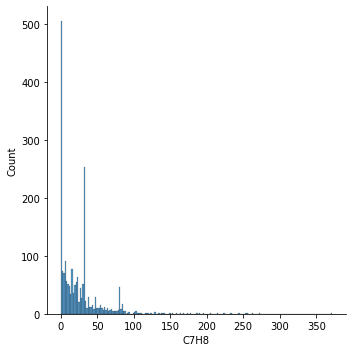

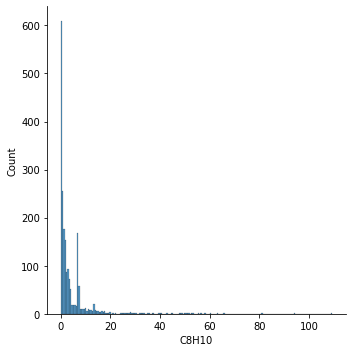

In [ ]:
constituent=df2.columns[2:]
for constituent in constituent:
  sns.displot(df2_group.get_group("Ahmedabad")[constituent],bins=200)

## ***3] Imputaion with KNN***

In [ ]:
df3=pd.read_csv('/content/drive/MyDrive/FTS-Air Quality Index Prediction/Processed data/Shubham imputed_cities_by_day.csv')

In [ ]:
df3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,0.00,74.01,116.810000,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,01-02-2015,66.00,55.31,99.526667,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,01-03-2015,132.00,38.78,89.840000,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,01-04-2015,150.00,60.90,125.633333,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,01-05-2015,156.00,47.31,107.300000,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.680000,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.420000,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.450000,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.050000,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


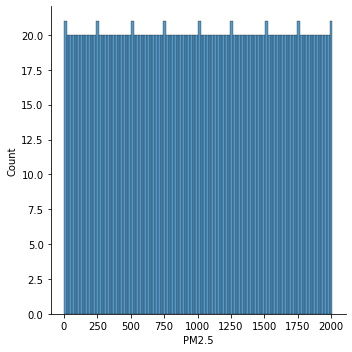

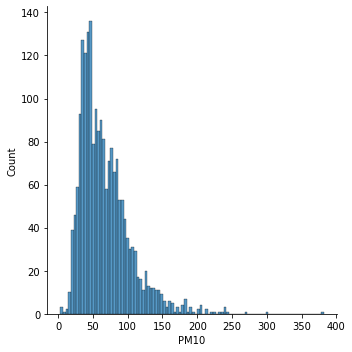

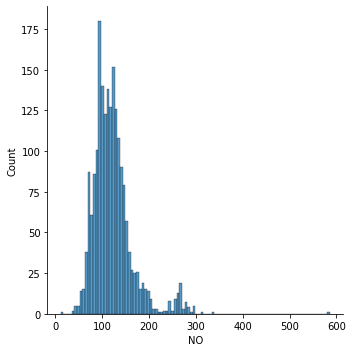

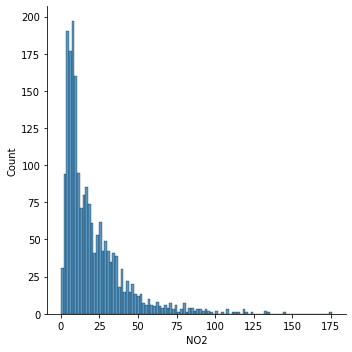

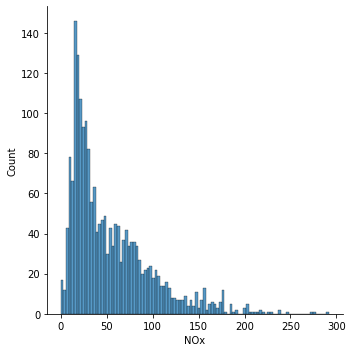

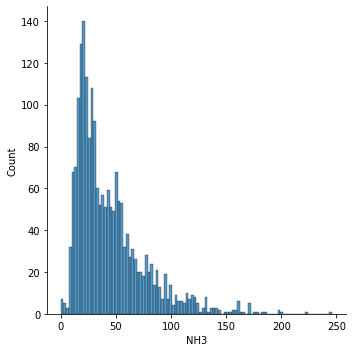

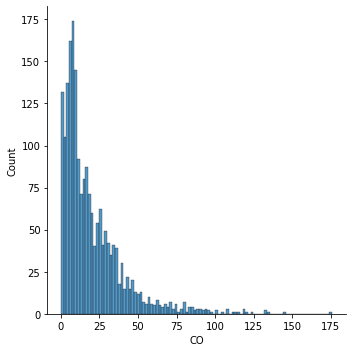

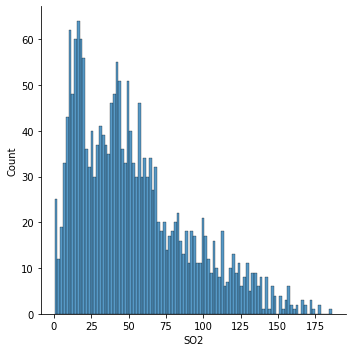

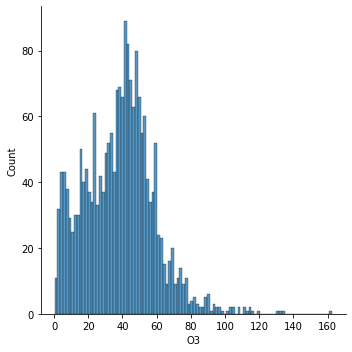

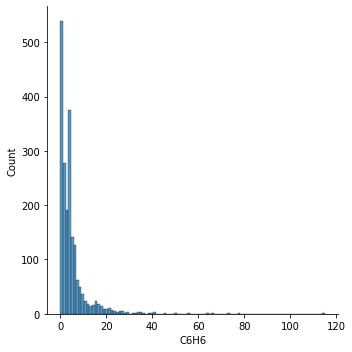

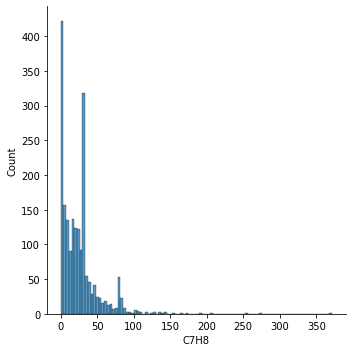

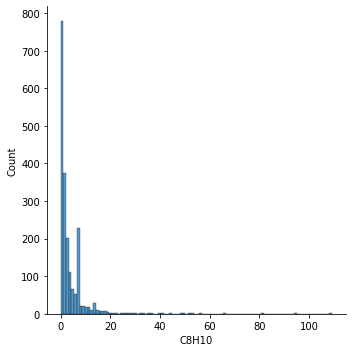

In [ ]:
#Distribution of atmospheric constituents in Ahmedabad city
df3_group=df3.groupby(df3.City)
constituent=df3.columns[2:-2]
for constituent in constituent:
  sns.displot(df3_group.get_group("Ahmedabad")[constituent],bins=100)

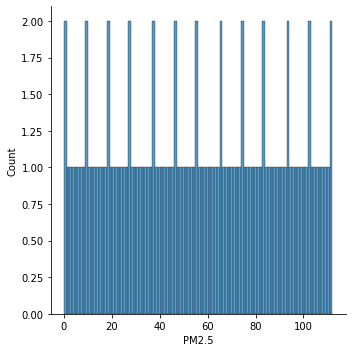

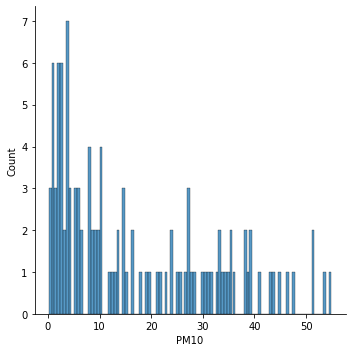

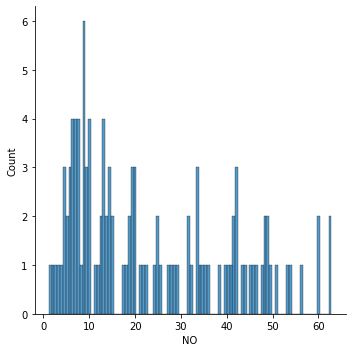

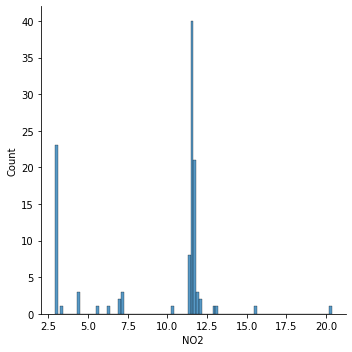

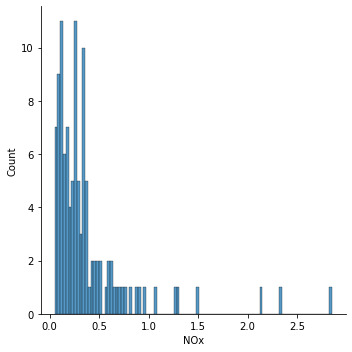

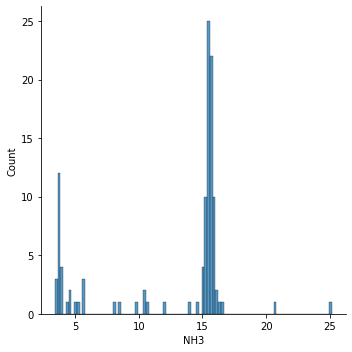

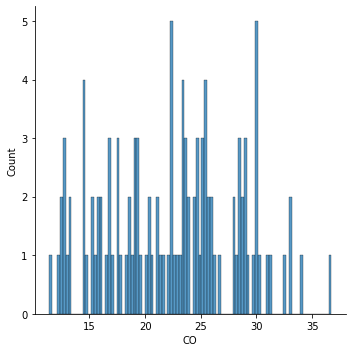

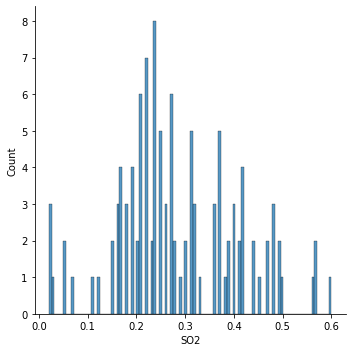

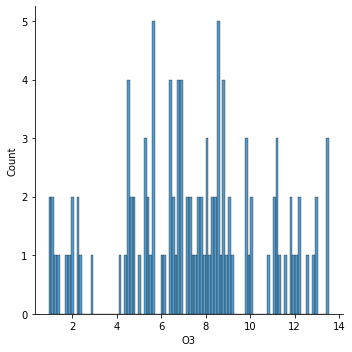

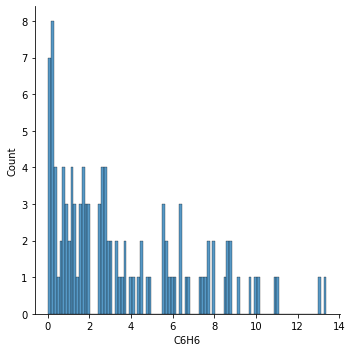

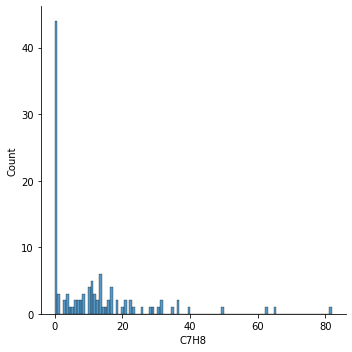

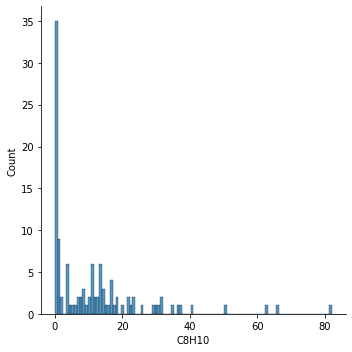

In [ ]:
#Distribution of atmospheric constituents in Aizawl city
df3_group=df3.groupby(df3.City)
constituent=df3.columns[2:-2]
for constituent in constituent:
  sns.displot(df3_group.get_group("Aizawl")[constituent],bins=100)

In [ ]:
#Distribution of atmospheric constituents in Aizawl city
df3_group=df3.groupby(df3.City)
constituent=df3.columns[2:-2]
for constituent in constituent:
  sns.displot(df3_group.get_group("Aizawl")[constituent],bins=100)

# ***Calculating AQI (Air Quality Index)***

In [ ]:
def aqi_calc(df):
  #PM2.5 (Particulate Matter 2.5-micrometer)
  #PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

  df["PM2.5_SubIndex"] = df["PM2.5"].apply(lambda x: get_PM25_subindex(x))


  #PM10 (Particulate Matter 10-micrometer)
  #PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

  df["PM10_SubIndex"] = df["PM10"].apply(lambda x: get_PM10_subindex(x))


  #SO2 (Sulphur Dioxide)
  #SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

  df["SO2_SubIndex"] = df["SO2"].apply(lambda x: get_SO2_subindex(x))


  #NOx (Any Nitric x-oxide)
  #NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:
  def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

  df["NOx_SubIndex"] = df["NOx"].apply(lambda x: get_NOx_subindex(x))


  #NH3 (Ammonia)
  #NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below: 
  def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

  df["NH3_SubIndex"] = df["NH3"].apply(lambda x: get_NH3_subindex(x))


  #CO (Carbon Monoxide)
  #CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:
  def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

  df["CO_SubIndex"] = df["CO"].apply(lambda x: get_CO_subindex(x))


  #O3 (Ozone or Trioxygen)
  #O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

  df["O3_SubIndex"] = df["O3"].apply(lambda x: get_O3_subindex(x))
  

  def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

  df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

  df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
  df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
  df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

  df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

In [ ]:
aqi_calc(df1)
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,1/1/2015,73.24,141.54,0.92,18.22,17.15,25.822565,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,144.133333,127.693333,34.5500,21.4375,6.455641,46.000000,149.058824,7,149.0,Moderate
1,Ahmedabad,1/2/2015,73.24,141.54,0.97,15.69,16.46,25.822565,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,144.133333,127.693333,30.6875,20.5750,6.455641,48.500000,34.060000,7,144.0,Moderate
2,Ahmedabad,1/3/2015,73.24,141.54,17.40,19.30,29.70,25.822565,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,144.133333,127.693333,36.3375,37.1250,6.455641,302.352941,30.700000,7,302.0,Very Poor
3,Ahmedabad,1/4/2015,73.24,141.54,1.70,18.48,17.97,25.822565,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,144.133333,127.693333,23.2375,22.4625,6.455641,85.000000,36.080000,7,144.0,Moderate
4,Ahmedabad,1/5/2015,73.24,141.54,22.10,21.42,37.76,25.822565,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,144.133333,127.693333,49.1625,47.2000,6.455641,330.000000,39.310000,7,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,25.033333,50.940000,10.6875,24.4250,3.117500,23.500000,23.300000,7,51.0,Satisfactory
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,40.633333,74.090000,15.9000,20.6625,2.997500,26.000000,30.140000,7,74.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,38.183333,65.730000,10.5250,22.9125,2.677500,24.000000,30.960000,7,66.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,27.733333,49.970000,12.3000,23.5000,2.507500,26.000000,28.300000,7,50.0,Good


In [ ]:
df1['AQI']=df1['AQI'].fillna(df1['AQI_calculated'])
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna(df1['AQI_bucket_calculated'])
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,1/1/2015,73.24,141.54,0.92,18.22,17.15,25.822565,0.92,27.64,133.36,0.00,0.02,0.00,149.0,Moderate,144.133333,127.693333,34.5500,21.4375,6.455641,46.000000,149.058824,7,149.0,Moderate
1,Ahmedabad,1/2/2015,73.24,141.54,0.97,15.69,16.46,25.822565,0.97,24.55,34.06,3.68,5.50,3.77,144.0,Moderate,144.133333,127.693333,30.6875,20.5750,6.455641,48.500000,34.060000,7,144.0,Moderate
2,Ahmedabad,1/3/2015,73.24,141.54,17.40,19.30,29.70,25.822565,17.40,29.07,30.70,6.80,16.40,2.25,302.0,Very Poor,144.133333,127.693333,36.3375,37.1250,6.455641,302.352941,30.700000,7,302.0,Very Poor
3,Ahmedabad,1/4/2015,73.24,141.54,1.70,18.48,17.97,25.822565,1.70,18.59,36.08,4.43,10.14,1.00,144.0,Moderate,144.133333,127.693333,23.2375,22.4625,6.455641,85.000000,36.080000,7,144.0,Moderate
4,Ahmedabad,1/5/2015,73.24,141.54,22.10,21.42,37.76,25.822565,22.10,39.33,39.31,7.01,18.89,2.78,330.0,Very Poor,144.133333,127.693333,49.1625,47.2000,6.455641,330.000000,39.310000,7,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,25.033333,50.940000,10.6875,24.4250,3.117500,23.500000,23.300000,7,51.0,Satisfactory
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,40.633333,74.090000,15.9000,20.6625,2.997500,26.000000,30.140000,7,74.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,38.183333,65.730000,10.5250,22.9125,2.677500,24.000000,30.960000,7,66.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,27.733333,49.970000,12.3000,23.5000,2.507500,26.000000,28.300000,7,50.0,Good


In [ ]:
aqi_calc(df2)
df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,1/1/2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,144.133333,127.693333,34.5500,21.4375,6.6600,46.000000,149.058824,7,149.0,Moderate
1,Ahmedabad,1/2/2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,144.133333,127.693333,30.6875,20.5750,6.6600,48.500000,34.060000,7,144.0,Moderate
2,Ahmedabad,1/3/2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,144.133333,127.693333,36.3375,37.1250,6.6600,302.352941,30.700000,7,302.0,Very Poor
3,Ahmedabad,1/4/2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,144.133333,127.693333,23.2375,22.4625,6.6600,85.000000,36.080000,7,144.0,Moderate
4,Ahmedabad,1/5/2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,144.133333,127.693333,49.1625,47.2000,6.6600,330.000000,39.310000,7,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,25.033333,50.940000,10.6875,24.4250,3.1175,23.500000,23.300000,7,51.0,Satisfactory
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,40.633333,74.090000,15.9000,20.6625,2.9975,26.000000,30.140000,7,74.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,38.183333,65.730000,10.5250,22.9125,2.6775,24.000000,30.960000,7,66.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,27.733333,49.970000,12.3000,23.5000,2.5075,26.000000,28.300000,7,50.0,Good


In [ ]:
df2['AQI']=df2['AQI'].fillna(df2['AQI_calculated'])
df2['AQI_Bucket']=df2['AQI_Bucket'].fillna(df2['AQI_bucket_calculated'])
df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,1/1/2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,149.0,Moderate,144.133333,127.693333,34.5500,21.4375,6.6600,46.000000,149.058824,7,149.0,Moderate
1,Ahmedabad,1/2/2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,144.0,Moderate,144.133333,127.693333,30.6875,20.5750,6.6600,48.500000,34.060000,7,144.0,Moderate
2,Ahmedabad,1/3/2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,302.0,Very Poor,144.133333,127.693333,36.3375,37.1250,6.6600,302.352941,30.700000,7,302.0,Very Poor
3,Ahmedabad,1/4/2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,144.0,Moderate,144.133333,127.693333,23.2375,22.4625,6.6600,85.000000,36.080000,7,144.0,Moderate
4,Ahmedabad,1/5/2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,330.0,Very Poor,144.133333,127.693333,49.1625,47.2000,6.6600,330.000000,39.310000,7,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,25.033333,50.940000,10.6875,24.4250,3.1175,23.500000,23.300000,7,51.0,Satisfactory
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,40.633333,74.090000,15.9000,20.6625,2.9975,26.000000,30.140000,7,74.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,38.183333,65.730000,10.5250,22.9125,2.6775,24.000000,30.960000,7,66.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,27.733333,49.970000,12.3000,23.5000,2.5075,26.000000,28.300000,7,50.0,Good


In [ ]:
aqi_calc(df3)
df3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,01-01-2015,0.00,74.01,116.810000,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,0.000000,74.01,34.5500,22.7750,4.2875,46.000000,149.058824,6,149.0,Moderate
1,Ahmedabad,01-02-2015,66.00,55.31,99.526667,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,120.000000,55.31,30.6875,19.6125,4.1150,48.500000,34.060000,7,120.0,Moderate
2,Ahmedabad,01-03-2015,132.00,38.78,89.840000,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,309.230769,38.78,36.3375,24.1250,7.4250,302.352941,30.700000,7,309.0,Very Poor
3,Ahmedabad,01-04-2015,150.00,60.90,125.633333,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,323.076923,60.90,23.2375,23.1000,4.4925,85.000000,36.080000,7,323.0,Very Poor
4,Ahmedabad,01-05-2015,156.00,47.31,107.300000,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,327.692308,47.31,49.1625,26.7750,9.4400,330.000000,39.310000,7,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.680000,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,25.033333,50.94,10.6875,24.4250,3.1175,23.500000,23.300000,7,51.0,Satisfactory
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.420000,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,40.633333,74.09,15.9000,20.6625,2.9975,26.000000,30.140000,7,74.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.450000,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,38.183333,65.73,10.5250,22.9125,2.6775,24.000000,30.960000,7,66.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.050000,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,27.733333,49.97,12.3000,23.5000,2.5075,26.000000,28.300000,7,50.0,Good


In [ ]:
df3['AQI']=df3['AQI'].fillna(df3['AQI_calculated'])
df3['AQI_Bucket']=df3['AQI_Bucket'].fillna(df3['AQI_bucket_calculated'])
df3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,01-01-2015,0.00,74.01,116.810000,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,0.00,149.0,Moderate,0.000000,74.01,34.5500,22.7750,4.2875,46.000000,149.058824,6,149.0,Moderate
1,Ahmedabad,01-02-2015,66.00,55.31,99.526667,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,3.77,120.0,Moderate,120.000000,55.31,30.6875,19.6125,4.1150,48.500000,34.060000,7,120.0,Moderate
2,Ahmedabad,01-03-2015,132.00,38.78,89.840000,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,2.25,309.0,Very Poor,309.230769,38.78,36.3375,24.1250,7.4250,302.352941,30.700000,7,309.0,Very Poor
3,Ahmedabad,01-04-2015,150.00,60.90,125.633333,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,1.00,323.0,Very Poor,323.076923,60.90,23.2375,23.1000,4.4925,85.000000,36.080000,7,323.0,Very Poor
4,Ahmedabad,01-05-2015,156.00,47.31,107.300000,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,2.78,330.0,Very Poor,327.692308,47.31,49.1625,26.7750,9.4400,330.000000,39.310000,7,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.680000,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,25.033333,50.94,10.6875,24.4250,3.1175,23.500000,23.300000,7,51.0,Satisfactory
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.420000,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,40.633333,74.09,15.9000,20.6625,2.9975,26.000000,30.140000,7,74.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.450000,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,38.183333,65.73,10.5250,22.9125,2.6775,24.000000,30.960000,7,66.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.050000,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,27.733333,49.97,12.3000,23.5000,2.5075,26.000000,28.300000,7,50.0,Good


# ***Visualization***

## ***Citywise AQI Distribution for df1(ffill-bfill)***

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

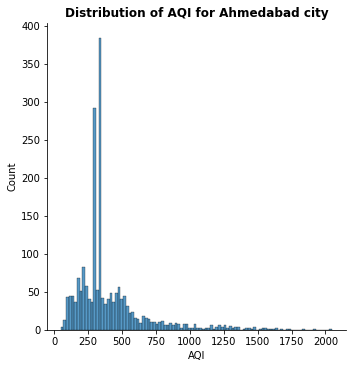

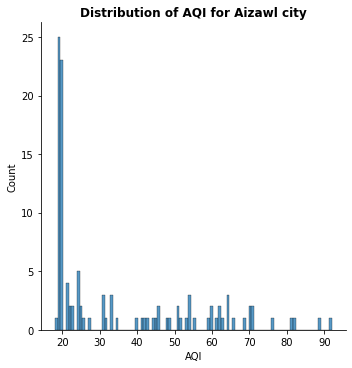

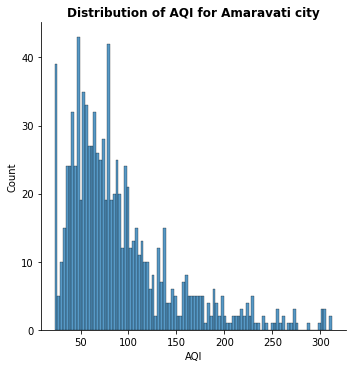

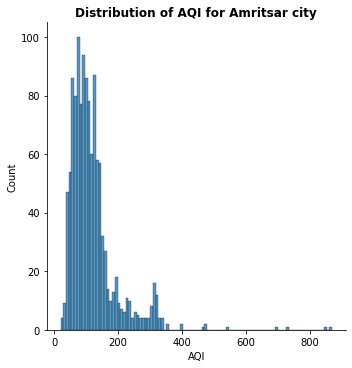

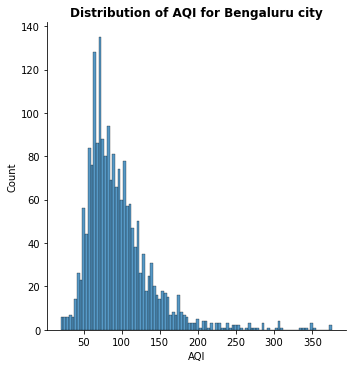

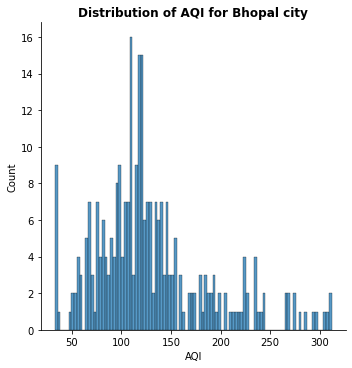

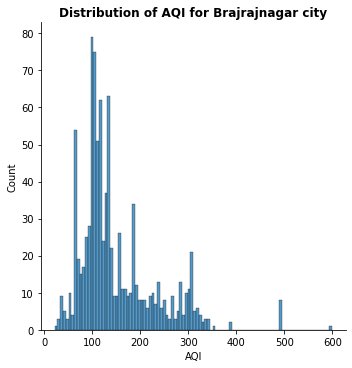

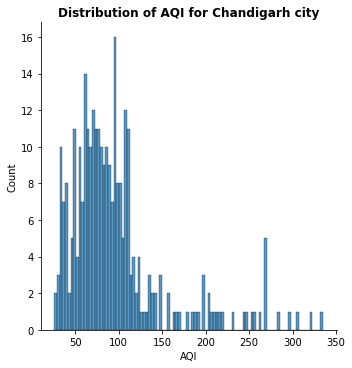

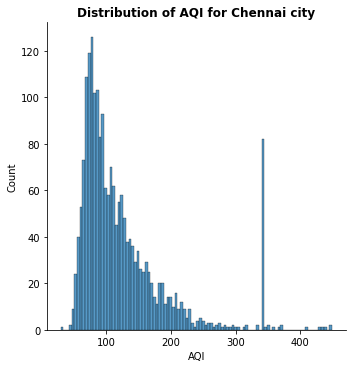

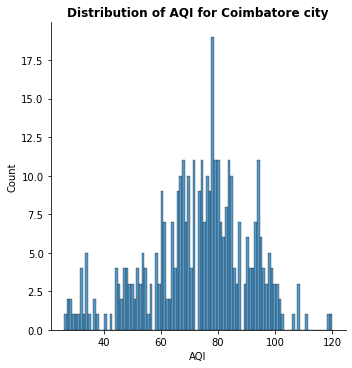

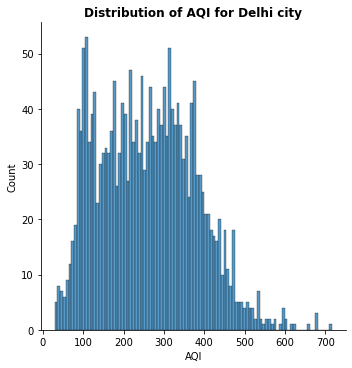

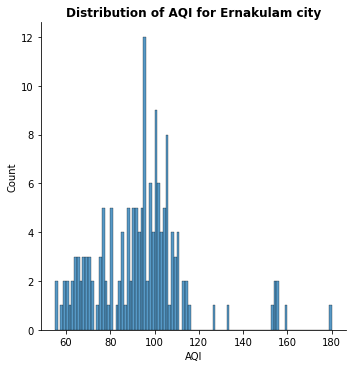

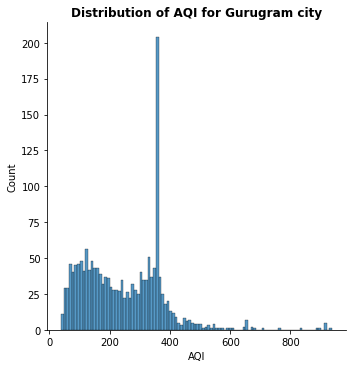

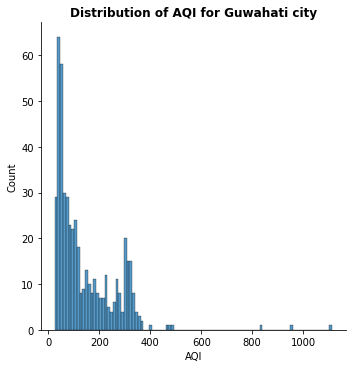

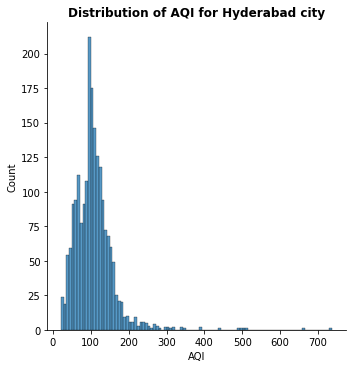

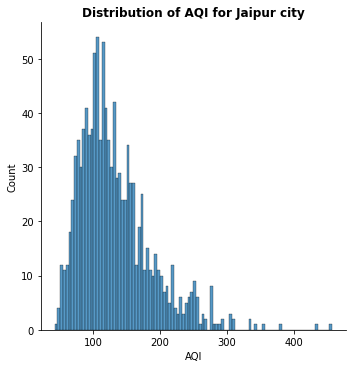

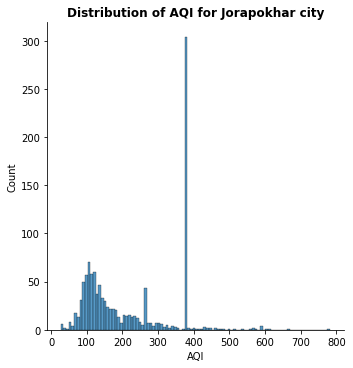

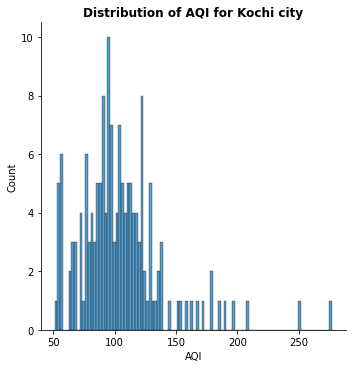

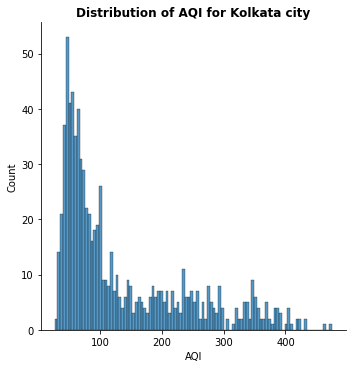

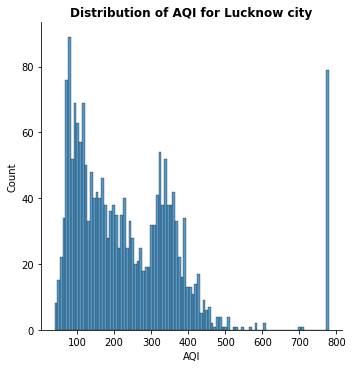

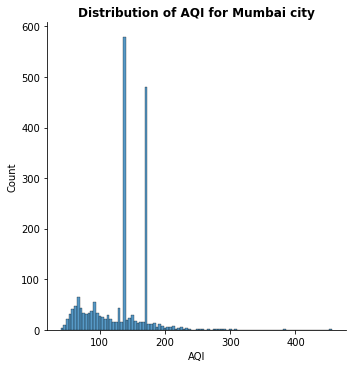

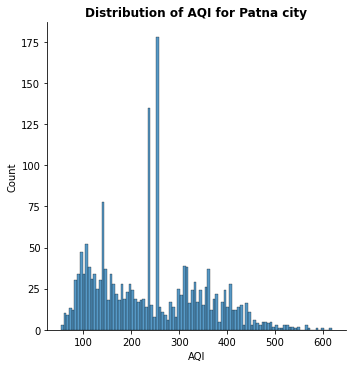

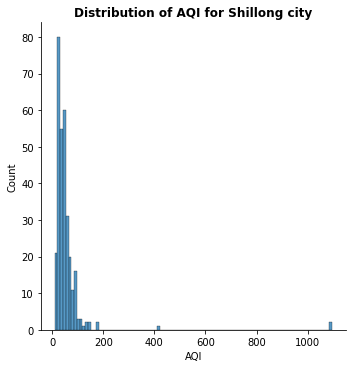

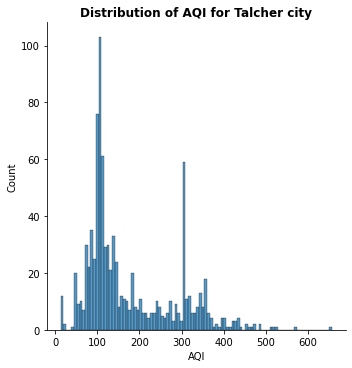

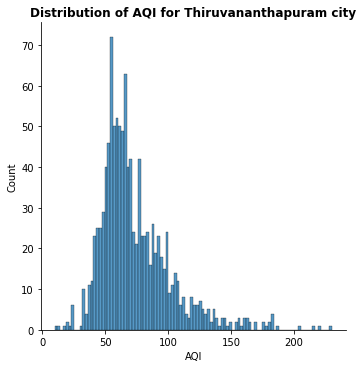

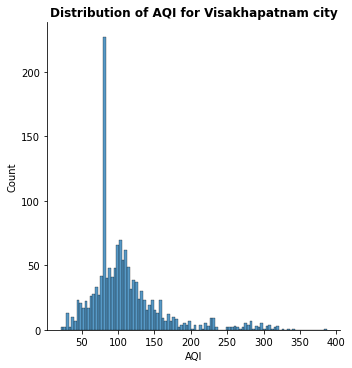

In [ ]:
df1_group=df1.groupby(df1.City)
for city in df1.City.unique():
  sns.displot(df1_group.get_group(city)['AQI'],bins=100)
  plt.title('Distribution of AQI for '+city+' city',fontweight="bold")

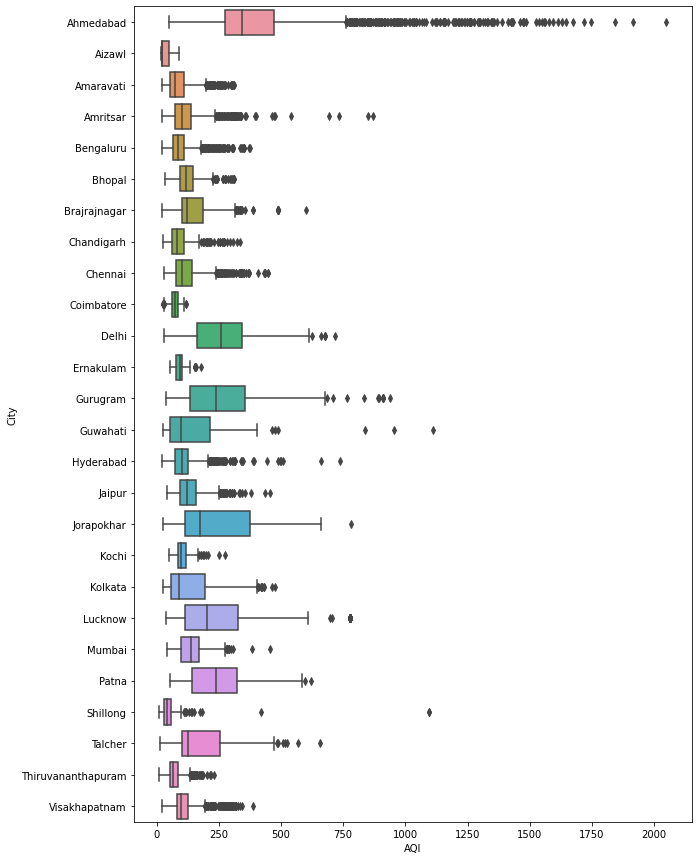

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df1,x='AQI',y='City')

In [ ]:
outlier_df1=pd.DataFrame(index=df1.City.unique())
Q1=[]
Q3=[]
IQR=[]
Lower_Whisker=[]
Upper_Whisker=[]
n_outliers=[]
for city in df1.City.unique():
  data=df1_group.get_group(city)['AQI']
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  Q1.append(q1)
  Q3.append(q3)
  IQR.append(iqr)
  Lower_Whisker.append(q1 - 1.5*iqr)
  Upper_Whisker.append(q3 + 1.5*iqr)
  n_outliers.append(((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).sum())
outlier_df1['Q1']=pd.Series(Q1).values
outlier_df1['Q3']=pd.Series(Q3).values
outlier_df1['IQR']=pd.Series(IQR).values
outlier_df1['Lower_Whisker']=pd.Series(Lower_Whisker).values
outlier_df1['Upper_Whisker']=pd.Series(Upper_Whisker).values
outlier_df1['n_outliers']=pd.Series(n_outliers).values

In [ ]:
outlier_df1

,Q1,Q3,IQR,Lower_Whisker,Upper_Whisker,n_outliers
Ahmedabad,276.00,470.00,194.00,-15.000,761.000,180
Aizawl,20.00,51.00,31.00,-26.500,97.500,0
Amaravati,52.00,110.00,58.00,-35.000,197.000,59
Amritsar,73.00,138.00,65.00,-24.500,235.500,90
Bengaluru,67.00,112.00,45.00,-0.500,179.500,86
Bhopal,95.00,148.00,53.00,15.500,227.500,24
Brajrajnagar,101.00,188.00,87.00,-29.500,318.500,30
Chandigarh,61.75,108.25,46.50,-8.000,178.000,30
Chennai,79.00,143.00,64.00,-17.000,239.000,136
Coimbatore,63.25,84.75,21.50,31.000,117.000,9


## ***Citywise AQI Distribution for df2(linear interpolated)***

In [ ]:
df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,1/1/2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,144.133333,127.693333,34.5500,21.4375,6.6600,46.000000,149.058824,7,149.0,Moderate
1,Ahmedabad,1/2/2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,144.133333,127.693333,30.6875,20.5750,6.6600,48.500000,34.060000,7,144.0,Moderate
2,Ahmedabad,1/3/2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,144.133333,127.693333,36.3375,37.1250,6.6600,302.352941,30.700000,7,302.0,Very Poor
3,Ahmedabad,1/4/2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,144.133333,127.693333,23.2375,22.4625,6.6600,85.000000,36.080000,7,144.0,Moderate
4,Ahmedabad,1/5/2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,144.133333,127.693333,49.1625,47.2000,6.6600,330.000000,39.310000,7,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,25.033333,50.940000,10.6875,24.4250,3.1175,23.500000,23.300000,7,51.0,Satisfactory
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,40.633333,74.090000,15.9000,20.6625,2.9975,26.000000,30.140000,7,74.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,38.183333,65.730000,10.5250,22.9125,2.6775,24.000000,30.960000,7,66.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,27.733333,49.970000,12.3000,23.5000,2.5075,26.000000,28.300000,7,50.0,Good


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

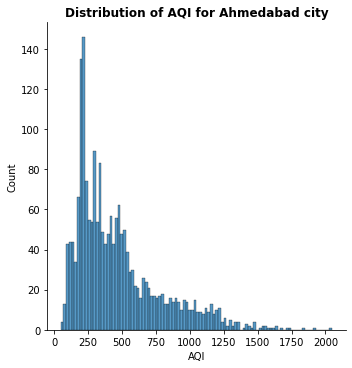

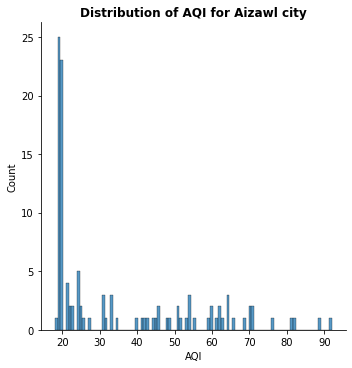

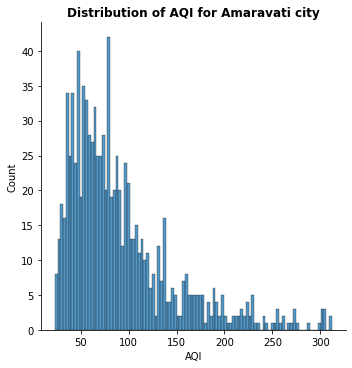

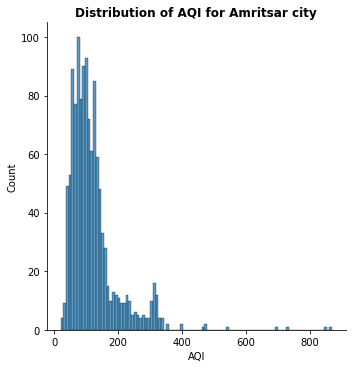

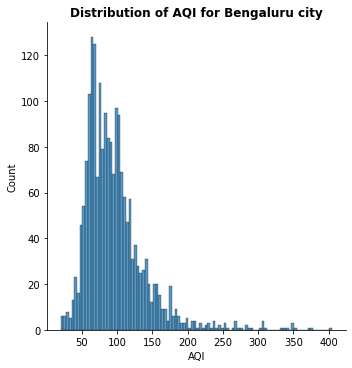

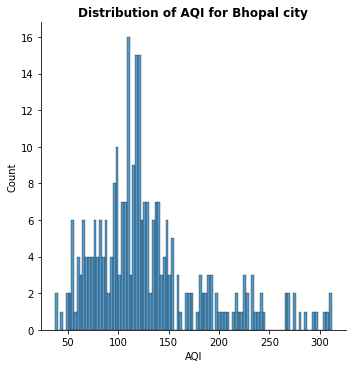

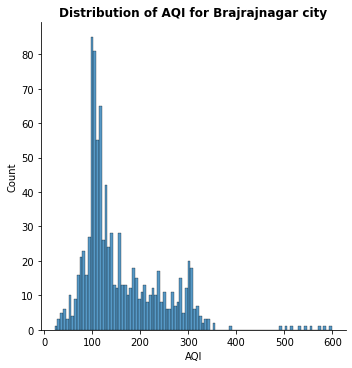

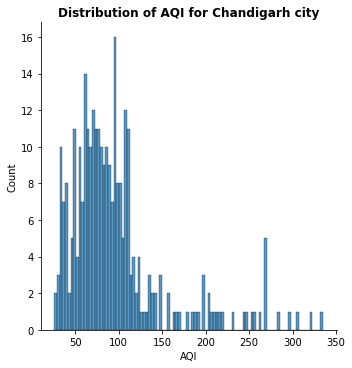

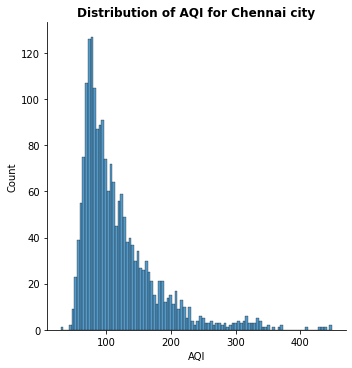

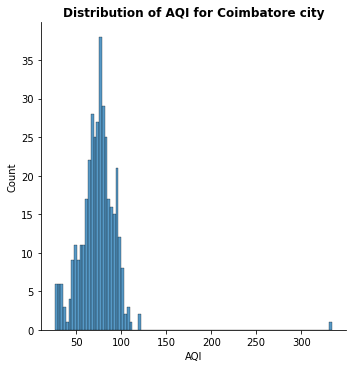

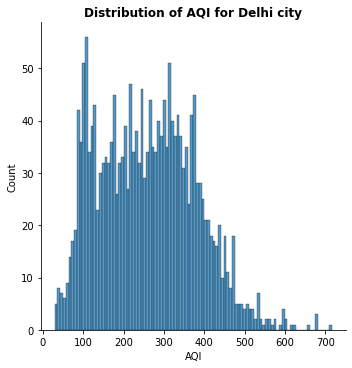

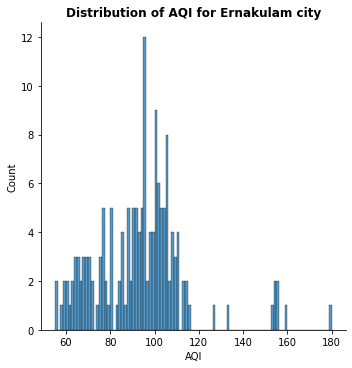

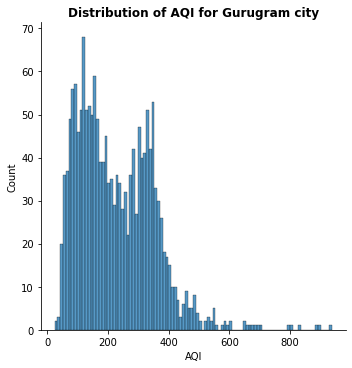

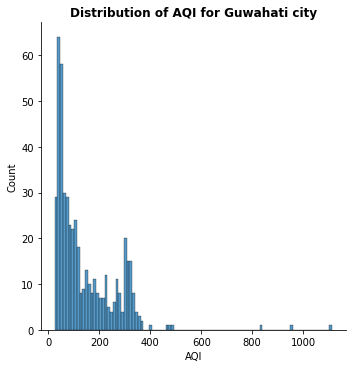

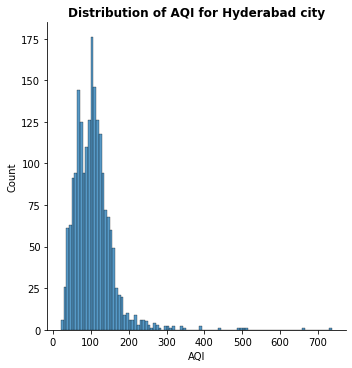

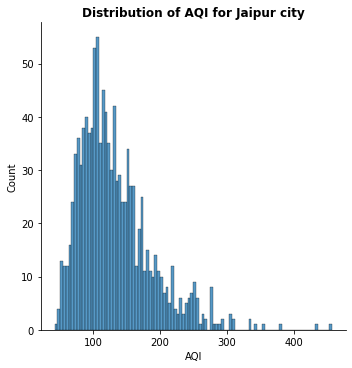

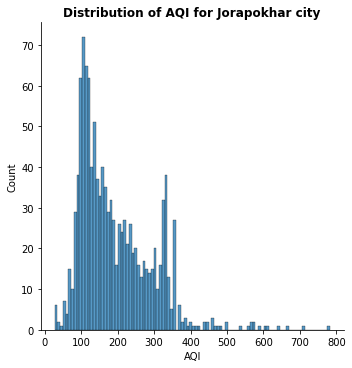

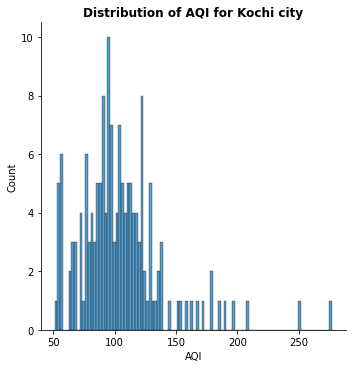

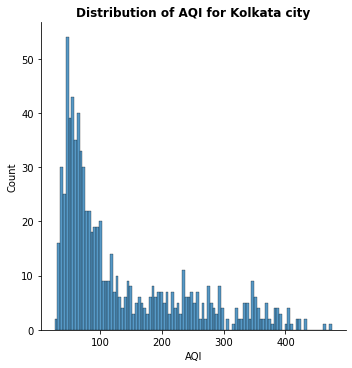

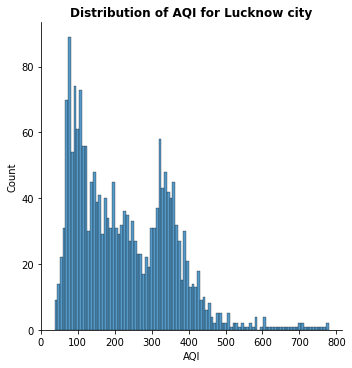

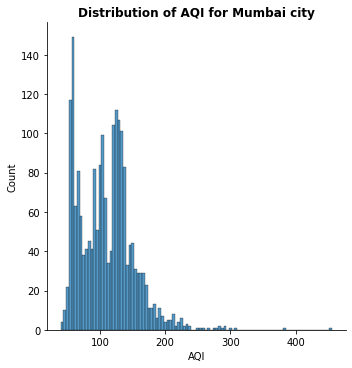

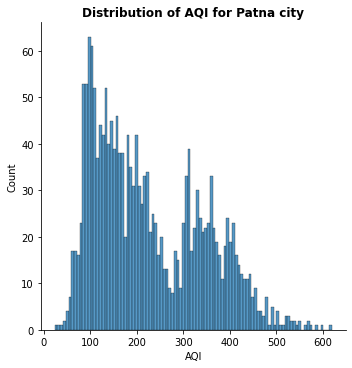

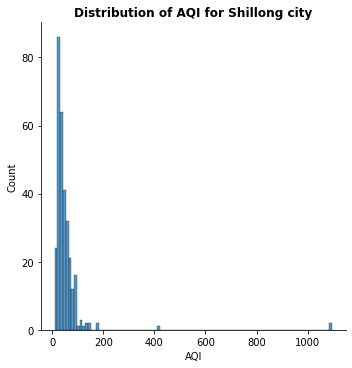

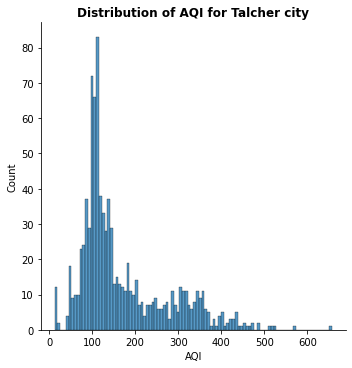

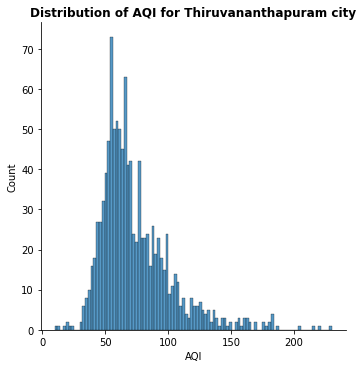

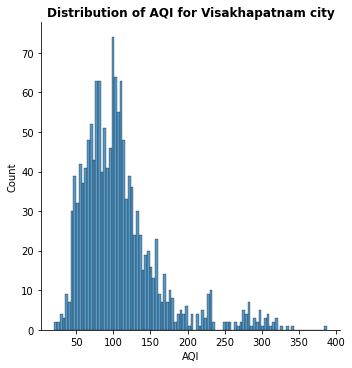

In [ ]:
df2_group=df2.groupby(df2.City)
for city in df2.City.unique():
  sns.displot(df2_group.get_group(city)['AQI'],bins=100)
  plt.title('Distribution of AQI for '+city+' city',fontweight="bold")

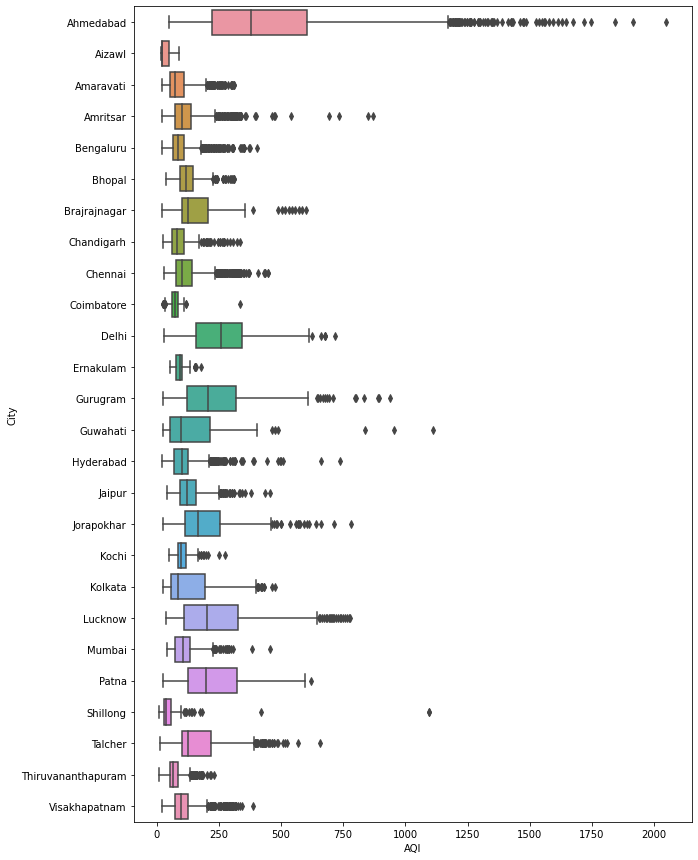

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df2,x='AQI',y='City')

In [ ]:
outlier_df2=pd.DataFrame(index=df2.City.unique())
Q1=[]
Q3=[]
IQR=[]
Lower_Whisker=[]
Upper_Whisker=[]
n_outliers=[]
for city in df2.City.unique():
  data=df2_group.get_group(city)['AQI']
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  Q1.append(q1)
  Q3.append(q3)
  IQR.append(iqr)
  Lower_Whisker.append(q1 - 1.5*iqr)
  Upper_Whisker.append(q3 + 1.5*iqr)
  n_outliers.append(((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).sum())
outlier_df2['Q1']=pd.Series(Q1).values
outlier_df2['Q3']=pd.Series(Q3).values
outlier_df2['IQR']=pd.Series(IQR).values
outlier_df2['Lower_Whisker']=pd.Series(Lower_Whisker).values
outlier_df2['Upper_Whisker']=pd.Series(Upper_Whisker).values
outlier_df2['n_outliers']=pd.Series(n_outliers).values
outlier_df2

,Q1,Q3,IQR,Lower_Whisker,Upper_Whisker,n_outliers
Ahmedabad,223.00,604.00,381.00,-348.500,1175.500,80
Aizawl,20.00,51.00,31.00,-26.500,97.500,0
Amaravati,52.00,111.00,59.00,-36.500,199.500,55
Amritsar,73.00,138.00,65.00,-24.500,235.500,94
Bengaluru,67.00,112.00,45.00,-0.500,179.500,87
Bhopal,95.00,148.00,53.00,15.500,227.500,24
Brajrajnagar,103.00,206.00,103.00,-51.500,360.500,10
Chandigarh,61.75,108.25,46.50,-8.000,178.000,30
Chennai,78.00,141.00,63.00,-16.500,235.500,98
Coimbatore,64.00,85.00,21.00,32.500,116.500,15


## ***Citywise AQI Distribution for df3(KNN imputed)***

In [ ]:
df3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,01-01-2015,0.00,74.01,116.810000,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,0.00,149.0,Moderate,0.000000,74.01,34.5500,22.7750,4.2875,46.000000,149.058824,6,149.0,Moderate
1,Ahmedabad,01-02-2015,66.00,55.31,99.526667,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,3.77,120.0,Moderate,120.000000,55.31,30.6875,19.6125,4.1150,48.500000,34.060000,7,120.0,Moderate
2,Ahmedabad,01-03-2015,132.00,38.78,89.840000,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,2.25,309.0,Very Poor,309.230769,38.78,36.3375,24.1250,7.4250,302.352941,30.700000,7,309.0,Very Poor
3,Ahmedabad,01-04-2015,150.00,60.90,125.633333,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,1.00,323.0,Very Poor,323.076923,60.90,23.2375,23.1000,4.4925,85.000000,36.080000,7,323.0,Very Poor
4,Ahmedabad,01-05-2015,156.00,47.31,107.300000,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,2.78,330.0,Very Poor,327.692308,47.31,49.1625,26.7750,9.4400,330.000000,39.310000,7,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.680000,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,25.033333,50.94,10.6875,24.4250,3.1175,23.500000,23.300000,7,51.0,Satisfactory
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.420000,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,40.633333,74.09,15.9000,20.6625,2.9975,26.000000,30.140000,7,74.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.450000,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,38.183333,65.73,10.5250,22.9125,2.6775,24.000000,30.960000,7,66.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.050000,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,27.733333,49.97,12.3000,23.5000,2.5075,26.000000,28.300000,7,50.0,Good


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

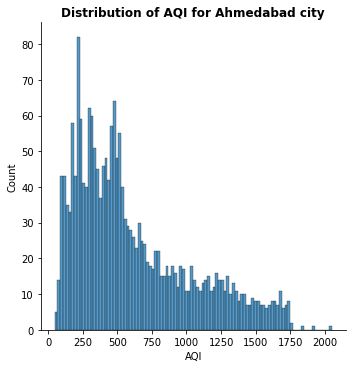

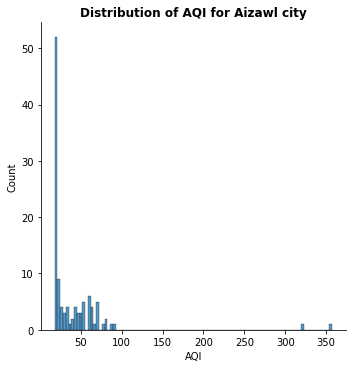

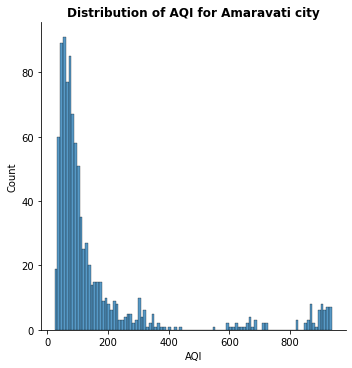

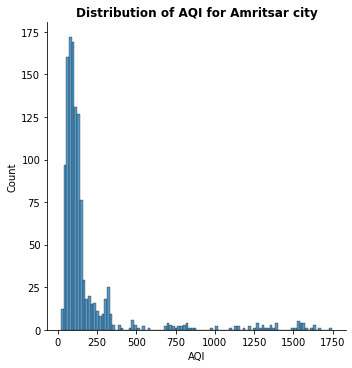

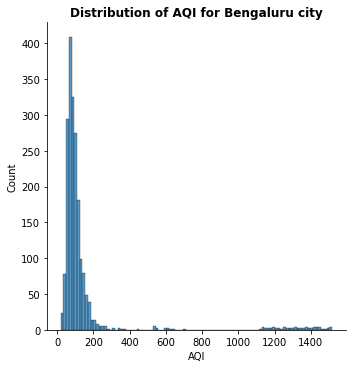

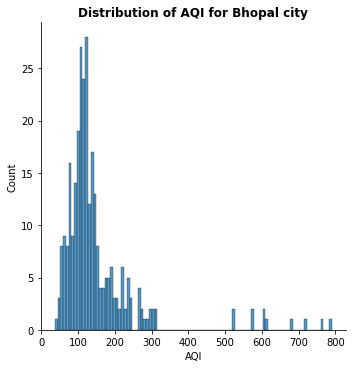

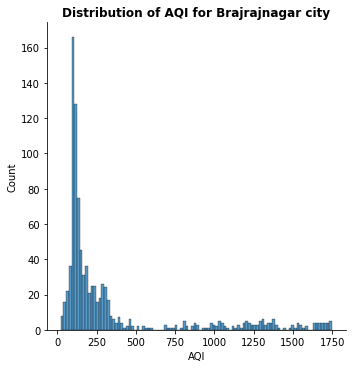

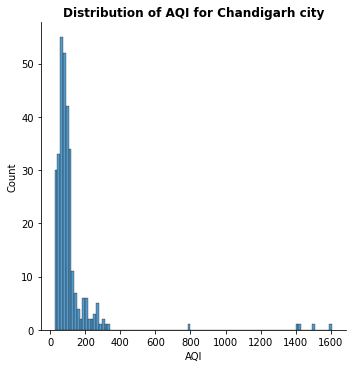

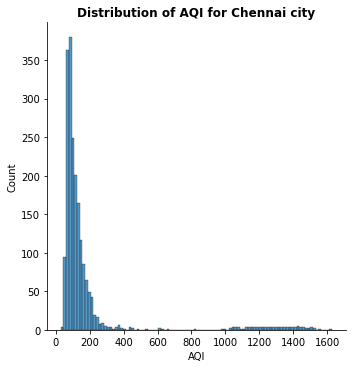

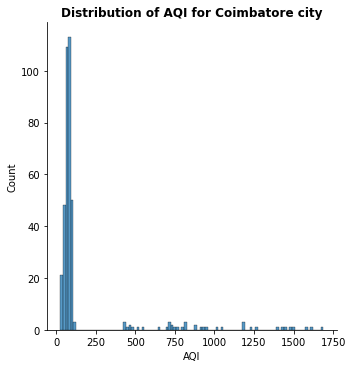

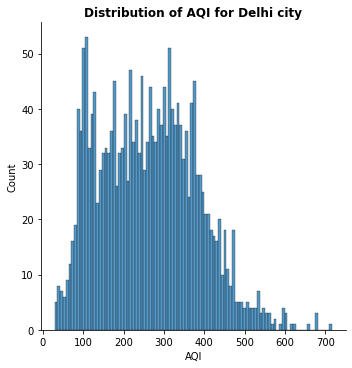

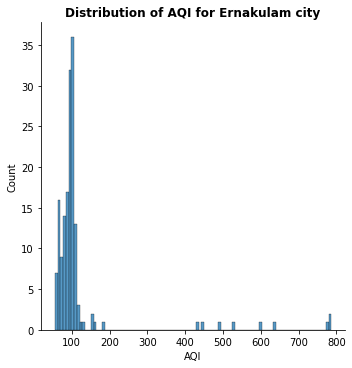

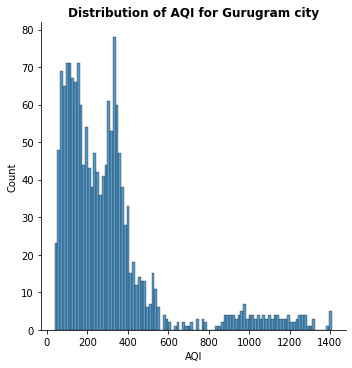

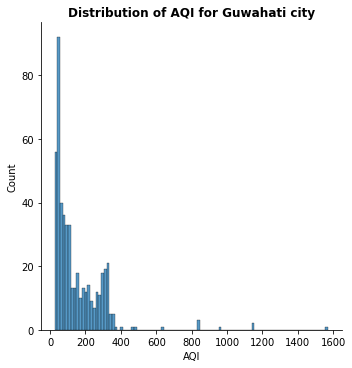

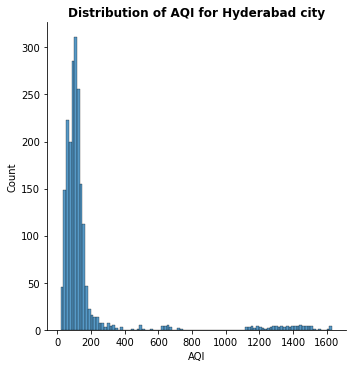

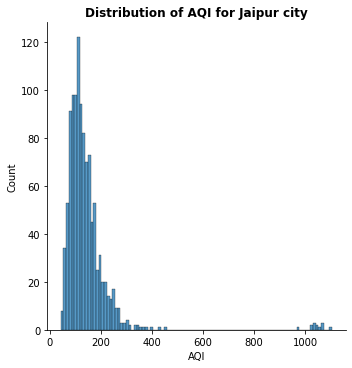

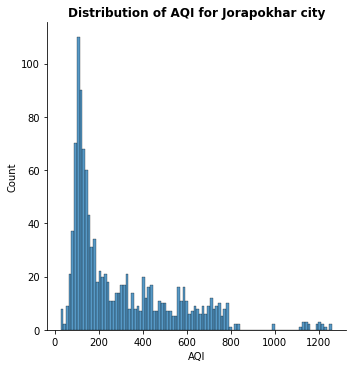

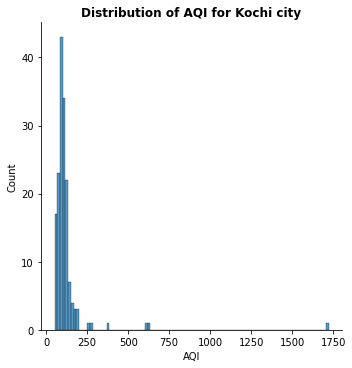

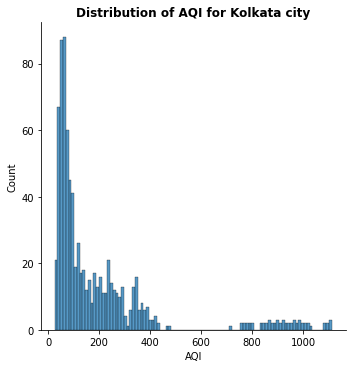

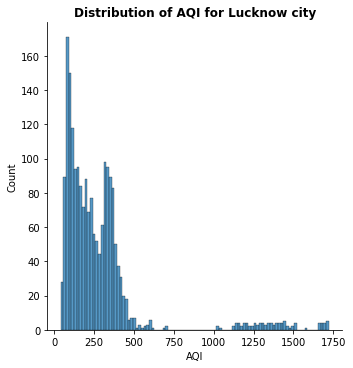

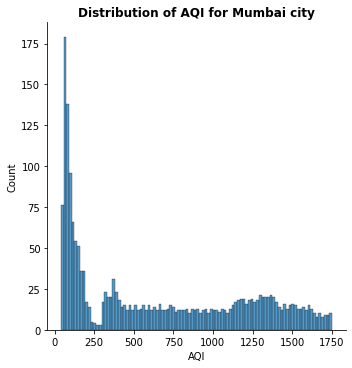

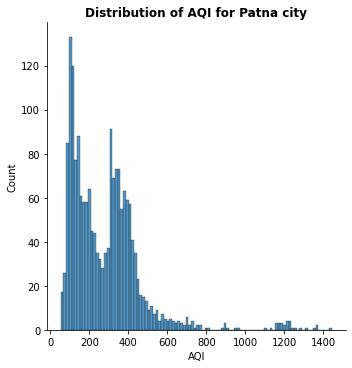

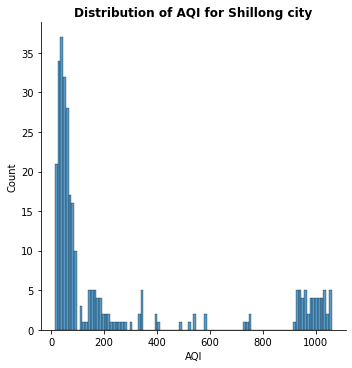

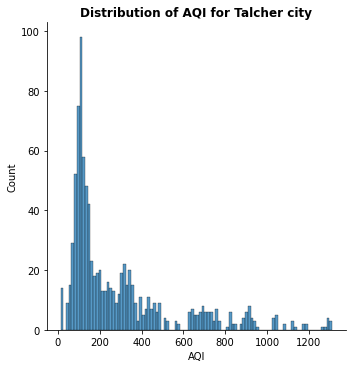

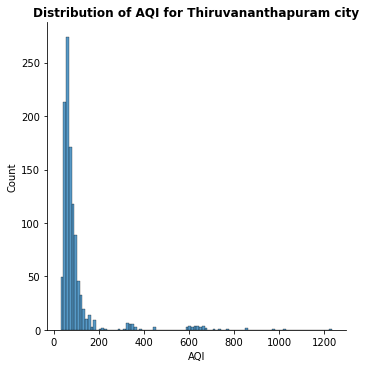

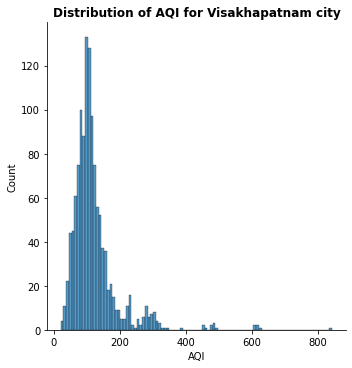

In [ ]:
df3_group=df3.groupby(df3.City)
for city in df3.City.unique():
  sns.displot(df3_group.get_group(city)['AQI'],bins=100)
  plt.title('Distribution of AQI for '+city+' city',fontweight="bold")

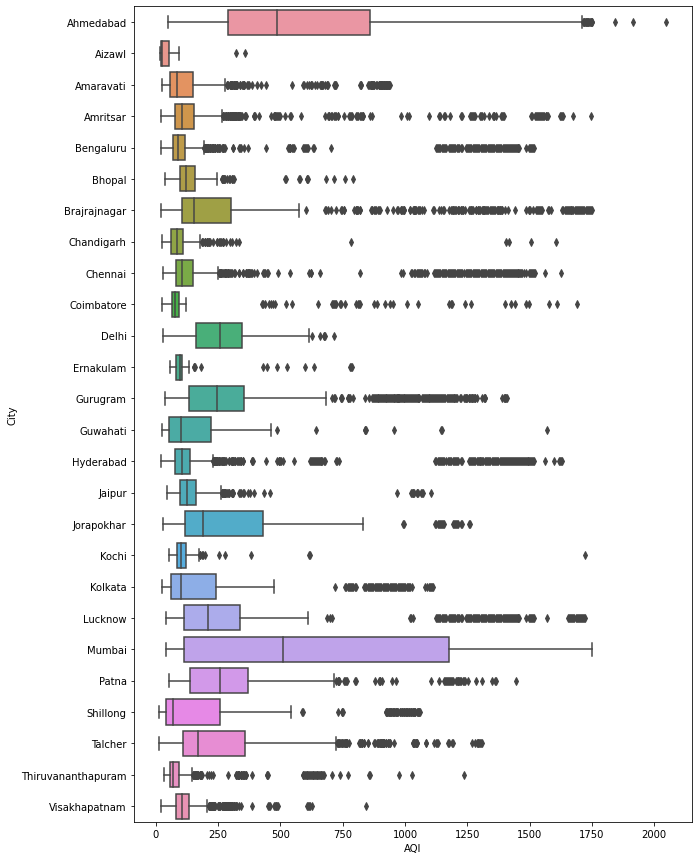

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df3,x='AQI',y='City')

In [ ]:
outlier_df3=pd.DataFrame(index=df3.City.unique())
Q1=[]
Q3=[]
IQR=[]
Lower_Whisker=[]
Upper_Whisker=[]
n_outliers=[]
for city in df3.City.unique():
  data=df3_group.get_group(city)['AQI']
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  Q1.append(q1)
  Q3.append(q3)
  IQR.append(iqr)
  Lower_Whisker.append(q1 - 1.5*iqr)
  Upper_Whisker.append(q3 + 1.5*iqr)
  n_outliers.append(((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).sum())
outlier_df3['Q1']=pd.Series(Q1).values
outlier_df3['Q3']=pd.Series(Q3).values
outlier_df3['IQR']=pd.Series(IQR).values
outlier_df3['Lower_Whisker']=pd.Series(Lower_Whisker).values
outlier_df3['Upper_Whisker']=pd.Series(Upper_Whisker).values
outlier_df3['n_outliers']=pd.Series(n_outliers).values
outlier_df3

,Q1,Q3,IQR,Lower_Whisker,Upper_Whisker,n_outliers
Ahmedabad,291.00,860.00,569.00,-562.500,1713.500,19
Aizawl,20.00,51.00,31.00,-26.500,97.500,2
Amaravati,58.00,148.50,90.50,-77.750,284.250,118
Amritsar,75.00,152.00,77.00,-40.500,267.500,165
Bengaluru,68.00,118.00,50.00,-7.000,193.000,148
Bhopal,99.00,159.00,60.00,9.000,249.000,25
Brajrajnagar,107.00,303.00,196.00,-187.000,597.000,157
Chandigarh,62.00,110.00,48.00,-10.000,182.000,34
Chennai,79.00,148.00,69.00,-24.500,251.500,162
Coimbatore,65.25,91.75,26.50,25.500,131.500,42


## ***Outlier treatment***

In [ ]:
def outlier_aqi(df):
  Q1=df['AQI'].quantile(0.25)
  Q3=df['AQI'].quantile(0.75)
  IQR=Q3-Q1
  print("Q1=",Q1)
  print("Q3=",Q3)
  print("IQR=",IQR)
  Lower = Q1 - 1.5*IQR
  Upper = Q3 + 1.5*IQR
  print("Lower_Whisker=",Lower)
  print("Upper_Whisker=",Upper)
  print("No of outlier in AQI column=",((df['AQI'] < Lower) | (df['AQI'] > Upper)).sum())

In [ ]:
outlier_aqi(df1)

Q1= 83.0
Q3= 227.0
IQR= 144.0
Lower_Whisker= -133.0
Upper_Whisker= 443.0
No of outlier in AQI column= 1032


In [ ]:
df1['AQI'].where(cond = df1['AQI'] < 443.0, other=443.0, inplace=True)

In [ ]:
outlier_aqi(df2)

Q1= 83.0
Q3= 227.0
IQR= 144.0
Lower_Whisker= -133.0
Upper_Whisker= 443.0
No of outlier in AQI column= 0


In [ ]:
df2['AQI'].where(cond = df2['AQI'] < 443.0, other=443.0, inplace=True)

In [ ]:
outlier_aqi(df3)

Q1= 88.0
Q3= 313.0
IQR= 225.0
Lower_Whisker= -249.5
Upper_Whisker= 650.5
No of outlier in AQI column= 2958


In [ ]:
df3['AQI'].where(cond = df3['AQI'] < 650.0, other=650.0, inplace=True)

## ***Citywise AQI Trend***

In [ ]:
df3['month']=pd.DatetimeIndex(df3['Date']).month
df3['year']=pd.DatetimeIndex(df3['Date']).year

base=2015
df3['months']= (df3['year']-base)*12+ df3['month']
df_AQI_trend= df3.groupby(['City','months'])[['AQI']].mean().reset_index()
df_AQI_trend_groups=df_AQI_trend.groupby(df_AQI_trend.City)

def aqi_trend(city):
  fig = plt.figure(figsize = (8,3))
  sns.lineplot(
      data=df_AQI_trend_groups.get_group(city),
      x="months", y="AQI",color='green'
  )
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.title(city+" city AQI trend",fontweight="bold")
  plt.xlim([0,70])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

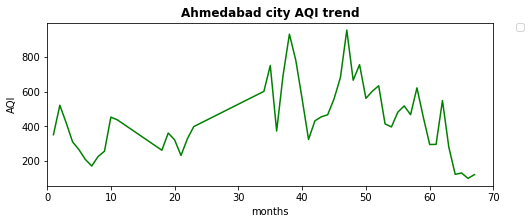

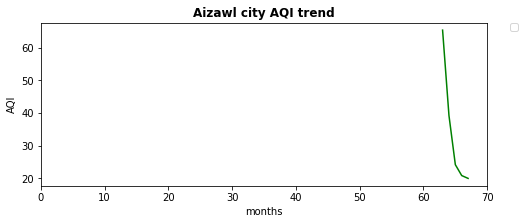

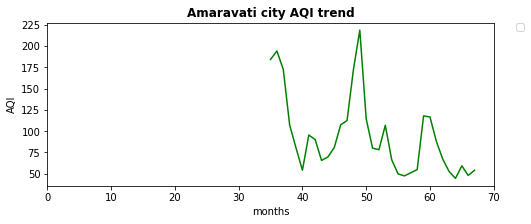

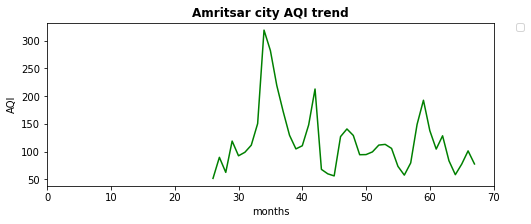

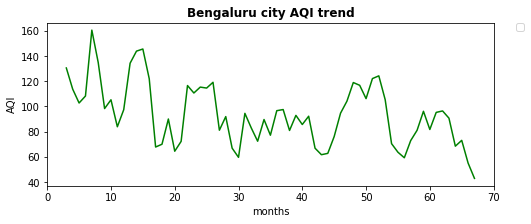

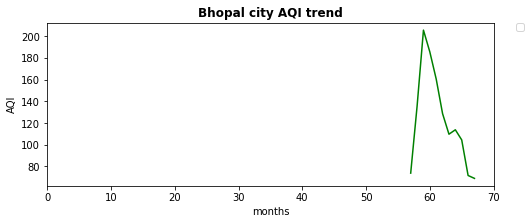

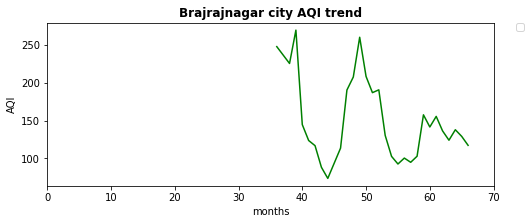

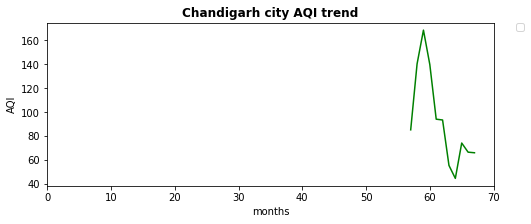

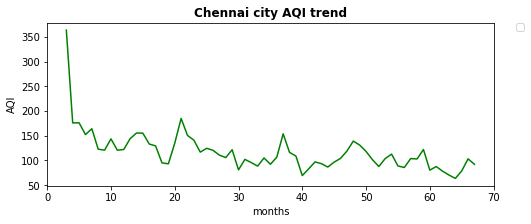

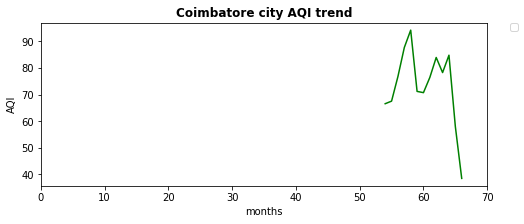

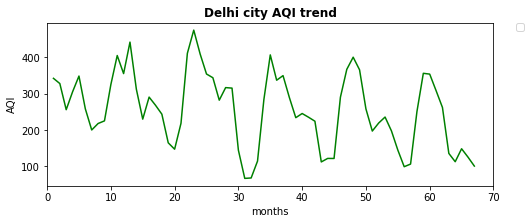

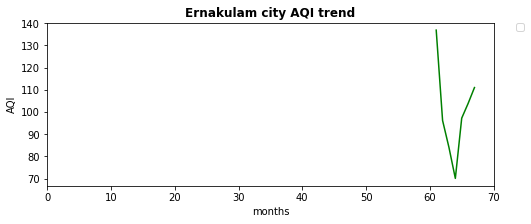

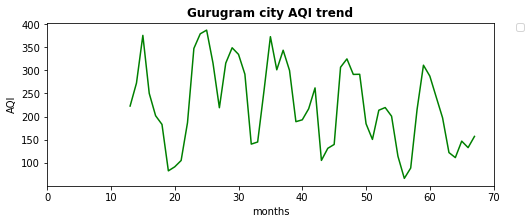

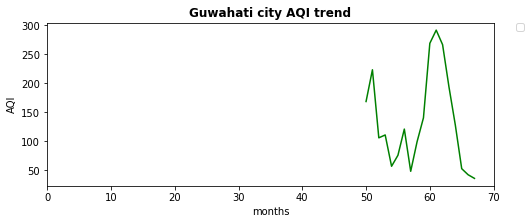

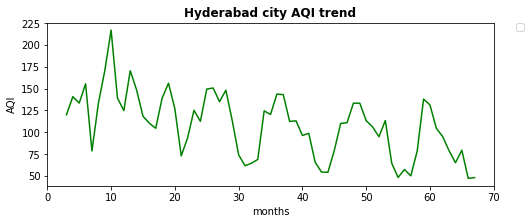

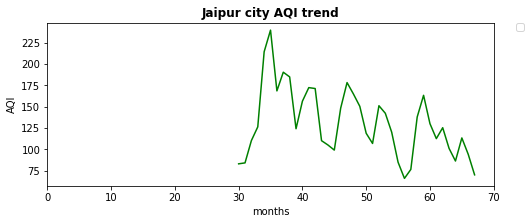

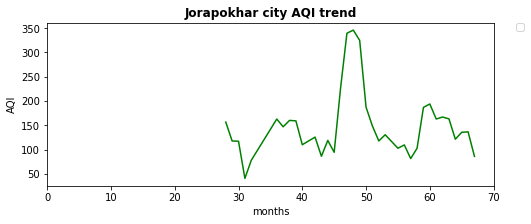

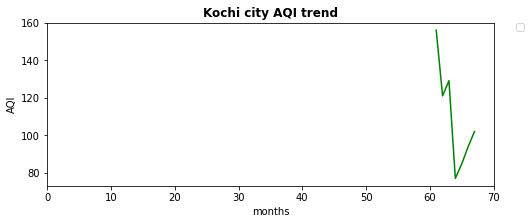

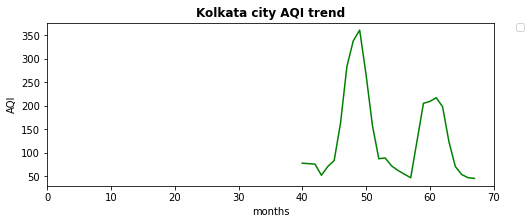

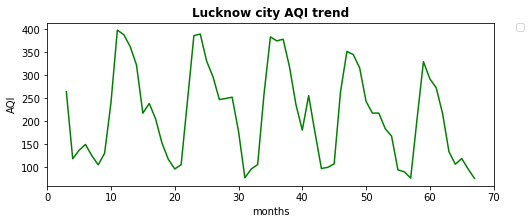

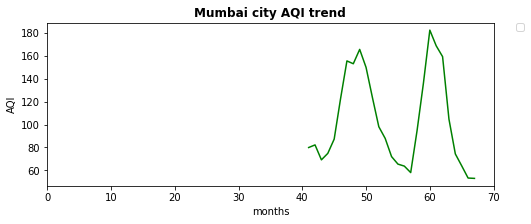

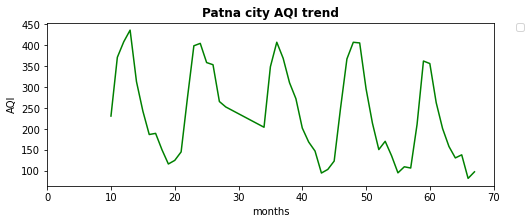

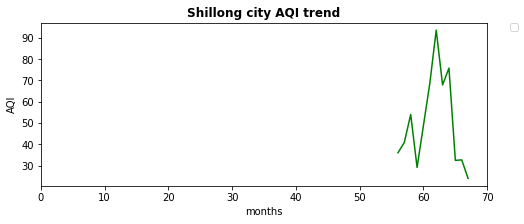

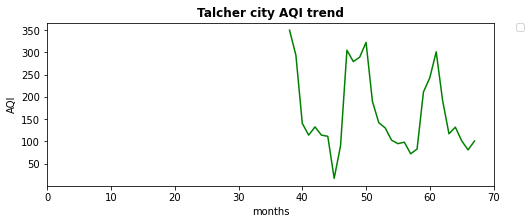

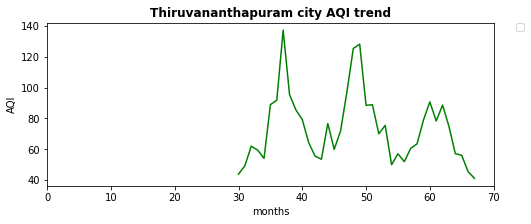

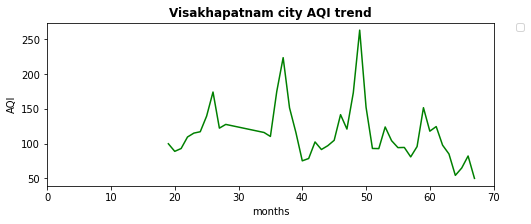

In [ ]:
for city in df3.City.unique():
  aqi_trend(city)